In [18]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [19]:
import sys, os

sys.path.append(os.path.join(os.getcwd(), '..', 'pplSIT', 'workflow', 'utils'))

In [20]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py, json

from scipy import signal
from neurosuite import DatHero

## Exercise and homework for L8 (signals)

In [21]:
source  = '/home/sobolev/nevermind/AG_Pecka/data/processed'

# lecture data
session = '009266_hippoSIT_2023-05-25_15-55-57'

# exercise data
session = '009266_hippoSIT_2023-05-04_19-47-15'

animal      = session.split('_')[0]
sessionpath = os.path.join(source, animal, session)
meta_file   = os.path.join(source, animal, session, 'meta.h5')
#dat_file    = os.path.join(source, animal, session, 'neurosuite', session + '.dat')
lfp_file    = os.path.join(source, animal, session, 'lfp.h5')

### Raw signals

In [ ]:
# get from RAW dat file and then decimate - long method
dh = DatHero(dat_file, s_rate=30000, ch_no=64)
ch1 = dh.get_single_channel(1)
ch1_1K = signal.decimate(ch1, 30)

In [10]:
# get from LFP
with h5py.File(lfp_file, 'r') as f:
    lfp = np.array(f['lfp'])
    
ch1 = lfp[:, 1]

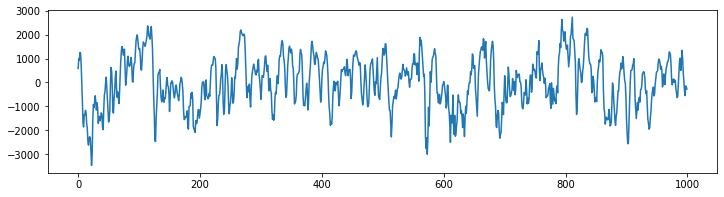

In [16]:
fig, ax = plt.subplots(figsize=(12, 3))
ax.plot(ch1[:1000])

In [17]:
np.save(os.path.join(sessionpath, 'ch1.npy'), ch1)

### Events

In [22]:
# extract events
with h5py.File(meta_file, 'r') as f:
    events = np.array(f['processed']['sound_events'])
    
# remove timeline indices
events = events[:, :2]

# remove events > 6 mins
#events = events[events[:, 0] < 360]

events.shape

(9599, 2)

In [23]:
np.savetxt(os.path.join(sessionpath, 'events_0_2400.csv'), events, fmt='%.4f', delimiter=',')